In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 1. 데이터 불러오기 및 기본 탐색
# 주어진 영화 리뷰 데이터 파일을 불러온다.
file_path = "../data/movie_reviews.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)

In [3]:
# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("데이터 미리보기")
df.head()

데이터 미리보기


,Review,Rating
0,괜찮은 영화였어요. 몇몇 장면이 특히 인상 깊었습니다.,6
1,평범했지만 나쁘지 않았습니다.,5
2,그냥 그랬어요. 특별히 기억에 남는 부분은 없네요.,3
3,한 번쯤 볼 만한 영화입니다.,6
4,정말 훌륭한 영화였어요. 연출과 연기가 모두 완벽했습니다.,10


In [4]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n데이터 정보")
df.info()


데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Rating  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# 2. 리뷰 길이 계산 및 새로운 컬럼 추가
# - 각 리뷰의 문자 길이를 계산하여 새로운 컬럼 'Review Length'를 생성합니다.
df["Review Length"] = df["Review"].apply(len)

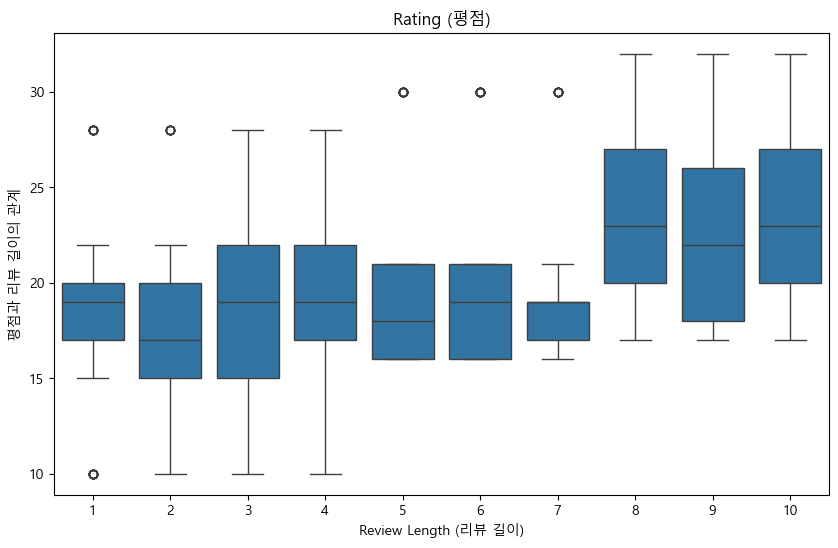

In [9]:
# 3. 평점과 리뷰 길이의 관계 시각화
# - 박스 플롯을 사용하여 평점별 리뷰 길이의 분포를 시각화합니다.
# - 이를 통해 특정 평점에서 리뷰 길이가 더 긴 경향이 있는지 확인할 수 있습니다.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Rating"], y=df["Review Length"])
plt.title("Rating (평점)")
plt.xlabel("Review Length (리뷰 길이)")
plt.ylabel("평점과 리뷰 길이의 관계")
plt.show()

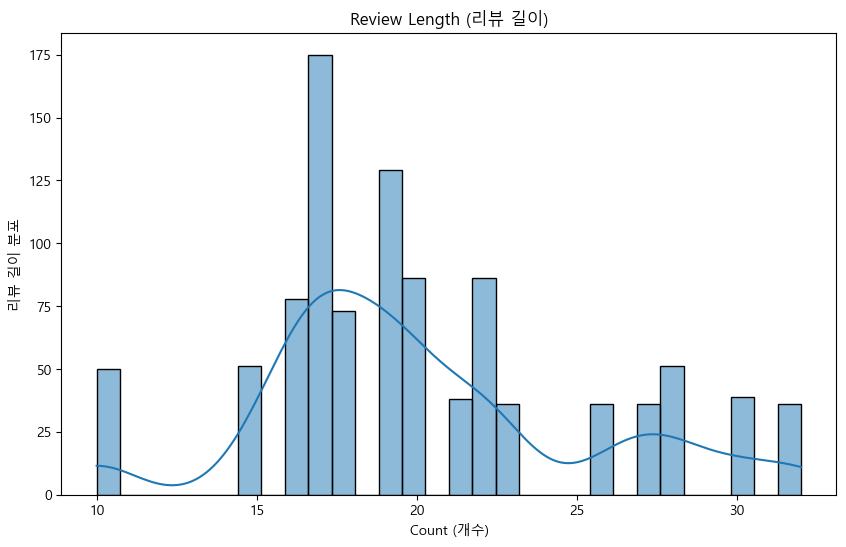

In [10]:
# 4. 리뷰 길이의 분포 확인
# - 히스토그램과 KDE(커널 밀도 추정)를 사용하여 리뷰 길이의 분포를 확인합니다.
# - 리뷰 길이의 평균과 편차를 시각적으로 파악할 수 있습니다.
plt.figure(figsize=(10, 6))
sns.histplot(df["Review Length"], bins=30, kde=True)
plt.title("Review Length (리뷰 길이)")
plt.xlabel("Count (개수)")
plt.ylabel("리뷰 길이 분포")
plt.show()

In [11]:
# 5. 장문 리뷰 필터링 (상위 25% 이상의 길이를 가진 리뷰)
# - 전체 리뷰 길이 데이터에서 75번째 백분위수(Q3)를 계산합니다.
# - Q3 이상인 리뷰를 '장문 리뷰'로 간주하여 필터링합니다.
long_review_threshold = df["Review Length"].quantile(0.75)  # 75% 백분위수
long_reviews = df[df["Review Length"] >= long_review_threshold]

In [12]:
# 6. 필터링된 장문 리뷰 개수 및 샘플 출력
# - 장문 리뷰의 개수를 출력하여 얼마나 많은 리뷰가 해당하는지 확인합니다.
print(f"장문 리뷰 개수: {long_reviews.shape[0]}")

장문 리뷰 개수: 320


In [13]:
# - 일부 장문 리뷰 샘플을 출력하여 필터링이 잘 되었는지 확인합니다.
print("\n장문 리뷰 샘플:")
long_reviews.head()


장문 리뷰 샘플:


,Review,Rating,Review Length
0,괜찮은 영화였어요. 몇몇 장면이 특히 인상 깊었습니다.,6,30
2,그냥 그랬어요. 특별히 기억에 남는 부분은 없네요.,3,28
4,정말 훌륭한 영화였어요. 연출과 연기가 모두 완벽했습니다.,10,32
6,스토리와 연출이 뛰어나서 감동적이었습니다.,8,23
8,스토리가 지루하고 이해가 잘 안 갔어요.,2,22
